<a href="https://colab.research.google.com/github/konrado10/NaukaGIT/blob/master/Zad127.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Zad 23

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import plotly.express as px

np.random.seed(42)
sns.set(font_scale=1.3)

In [16]:
# n_samples=700
raw_data = make_moons(n_samples=2000, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[ 1.58230488  0.36687604]
 [ 0.32765354  0.98236569]
 [ 0.48826986 -0.2467652 ]
 [-0.93742051 -0.02942909]
 [ 0.63439695 -0.41222371]]

[1 0 1 0 1]


In [17]:
df = pd.DataFrame(data = np.c_[data, target], columns = ['x1', 'x2', 'target'])
df.head()

,x1,x2,target
0,1.582305,0.366876,1.0
1,0.327654,0.982366,0.0
2,0.488270,-0.246765,1.0
3,-0.937421,-0.029429,0.0
4,0.634397,-0.412224,1.0


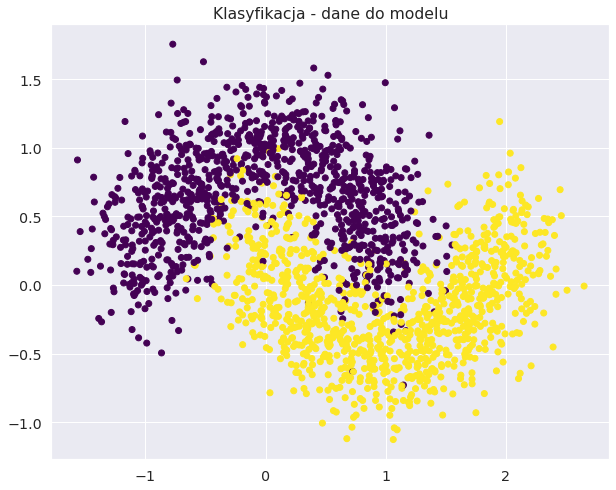

In [18]:
plt.figure(figsize=(10,8))
plt.scatter(x = df.x1, y = df.x2, c=target, cmap = 'viridis')
plt.title('Klasyfikacja - dane do modelu')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size =0.3)

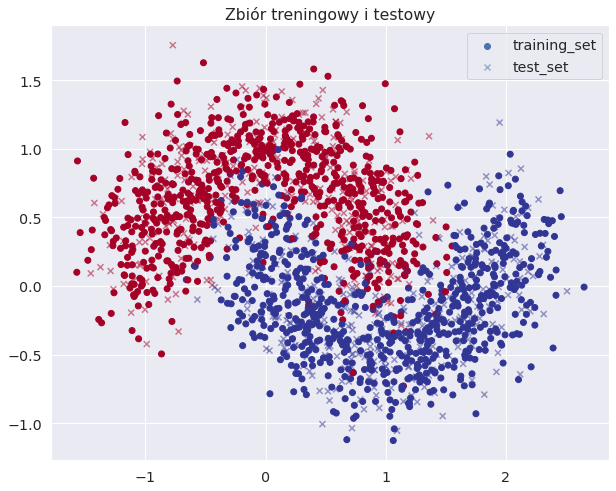

In [20]:
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdYlBu', label = 'training_set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', marker='x', alpha=0.5, label='test_set')
plt.title('Zbiór treningowy i testowy')
plt.legend()
plt.show()

### Regresja Logistyczna

In [21]:
from sklearn.linear_model import LogisticRegression

classf = LogisticRegression()
classf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



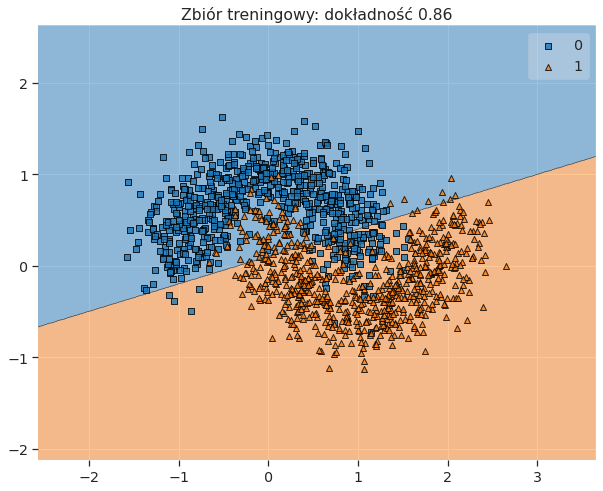

In [22]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10,8))
plot_decision_regions(X_train, y_train, classf)
plt.title(f'Zbiór treningowy: dokładność {classf.score(X_train, y_train):.2f}')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



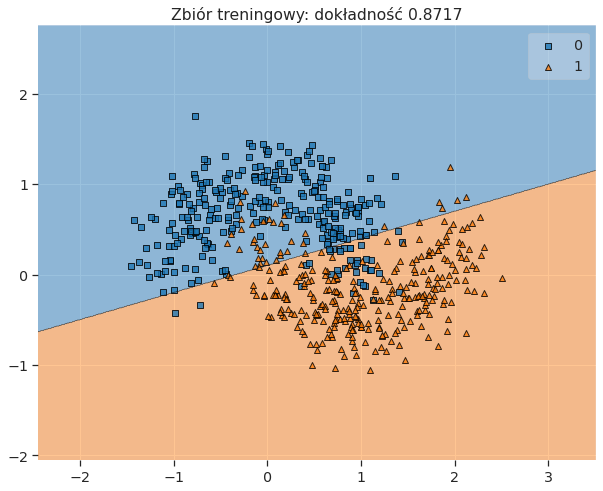

In [23]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, classf)
plt.title(f'Zbiór testowy: dokładność {classf.score(X_test, y_test):.4f}')
plt.show()

### Drzewa decyzyjne

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



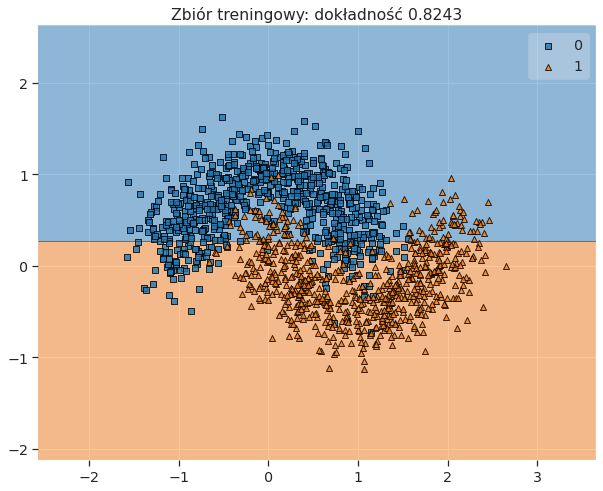

In [24]:
from sklearn.tree import DecisionTreeClassifier

classf = DecisionTreeClassifier(max_depth = 1)
classf.fit(X_train, y_train)

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, classf)
plt.title(f'Zbiór treningowy: dokładność {classf.score(X_train, y_train):.4f}')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



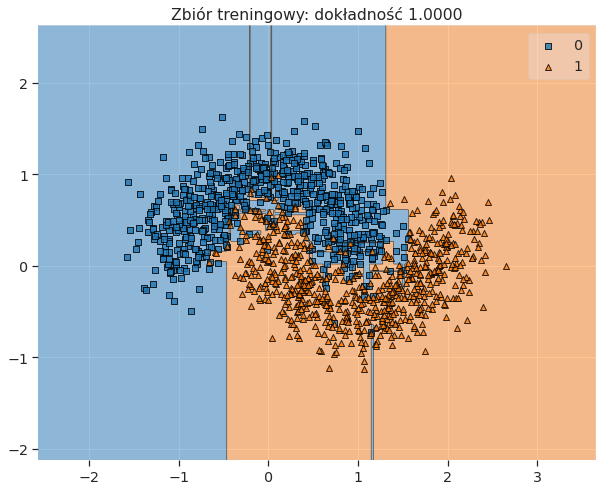

In [25]:
classf = DecisionTreeClassifier()
classf.fit(X_train, y_train)

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, classf)
plt.title(f'Zbiór treningowy: dokładność {classf.score(X_train, y_train):.4f}')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



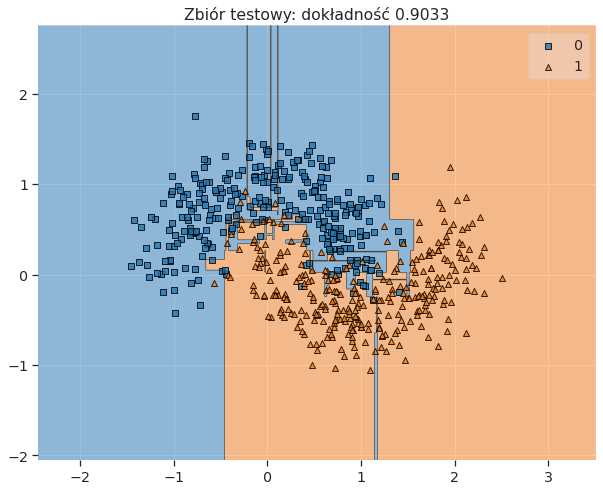

In [26]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, classf)
plt.title(f'Zbiór testowy: dokładność {classf.score(X_test, y_test):.4f}')
plt.show()

## Zad 24

### Walidacja krzyżowa

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import plotly.express as px

np.random.seed(42)
sns.set(font_scale=1.3)

In [28]:
raw_data = make_moons(n_samples=700, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[-0.15995017  1.03638621]
 [ 1.13114102 -0.58763612]
 [ 0.16966619  0.09420938]
 [ 0.51772753  0.81518706]
 [-0.68002085  0.15563468]]

[0 1 1 0 0]


In [29]:
df = pd.DataFrame(data=np.c_[data, target], columns=['x1', 'x2', 'target'])
df.head()

,x1,x2,target
0,-0.159950,1.036386,0.0
1,1.131141,-0.587636,1.0
2,0.169666,0.094209,1.0
3,0.517728,0.815187,0.0
4,-0.680021,0.155635,0.0


In [30]:
px.scatter(df, x = 'x1', y = 'x2', color = 'target')

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

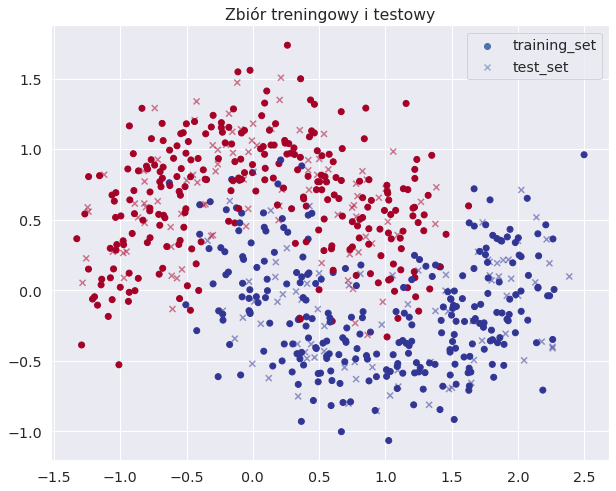

In [32]:
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdYlBu', label = 'training_set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', marker='x', alpha=0.5, label='test_set')
plt.title('Zbiór treningowy i testowy')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



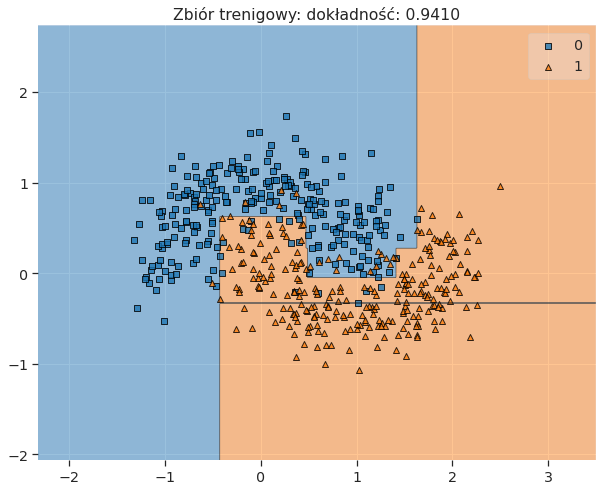

In [33]:
from sklearn.tree import DecisionTreeClassifier

classf = DecisionTreeClassifier(max_depth=5, min_samples_split=5)
classf.fit(X_train, y_train)

plt.figure(figsize=(10,8))
plot_decision_regions(X_train, y_train, classf)
plt.title(f'Zbiór trenigowy: dokładność: {classf.score(X_train, y_train):.4f}')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



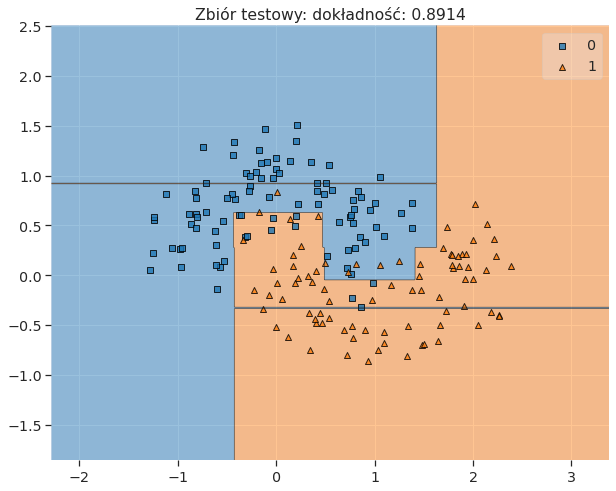

In [34]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_test, y_test, classf)
plt.title(f'Zbiór testowy: dokładność: {classf.score(X_test, y_test):.4f}')
plt.show()

In [35]:
from sklearn.model_selection import cross_val_score

classf = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

scores = cross_val_score(estimator = classf, X = X_train, y = y_train, cv = 10)
scores

array([0.86792453, 0.88679245, 0.94339623, 0.9245283 , 0.98113208,
       0.92307692, 0.94230769, 0.96153846, 0.88461538, 0.88461538])

In [37]:
print(f'Accuracy: {scores.mean():.4f} (+/-{scores.std()})')

Accuracy: 0.9200 (+/-0.03585568488461119)


In [38]:
classf = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

scores = cross_val_score(estimator = classf, X = X_train, y = y_train, cv = 15)
scores

array([0.85714286, 0.85714286, 0.91428571, 0.97142857, 0.91428571,
       0.91428571, 0.97142857, 0.91428571, 0.91428571, 0.97142857,
       0.88571429, 0.97142857, 0.94285714, 0.85714286, 0.85714286])

In [39]:
print(f'Accuracy: {scores.mean():.4f} (+/-{scores.std()})')

Accuracy: 0.9143 (+/-0.043015580154804646)


In [42]:
df = pd.DataFrame(data = scores, columns = ['score'])

In [43]:
df

,score
0,0.857143
1,0.857143
2,0.914286
3,0.971429
4,0.914286
5,0.914286
6,0.971429
7,0.914286
8,0.914286
9,0.971429


In [49]:
px.bar(df, y = 'score', color = 'score', width = 700, height = 500, 
       title = f'Walidacja krzyżowa (15 podziałów) | Accuracy: {df.mean()[0]:.4f} (+/- {df.std()[0]:.3f})',
       color_continuous_scale=px.colors.sequential.Inferno_r, range_color=[df.min()[0] - 0.01, 1.0])

## Zad 25

### Przeszukiwanie siatki

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import plotly.express as px

np.random.seed(42)
sns.set(font_scale=1.3)

In [2]:
raw_data = make_moons(n_samples=2000, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[ 1.58230488  0.36687604]
 [ 0.32765354  0.98236569]
 [ 0.48826986 -0.2467652 ]
 [-0.93742051 -0.02942909]
 [ 0.63439695 -0.41222371]]

[1 0 1 0 1]


In [3]:

df = pd.DataFrame(data=np.c_[data, target], columns=['x1', 'x2', 'target'])
df.head()

,x1,x2,target
0,1.582305,0.366876,1.0
1,0.327654,0.982366,0.0
2,0.488270,-0.246765,1.0
3,-0.937421,-0.029429,0.0
4,0.634397,-0.412224,1.0


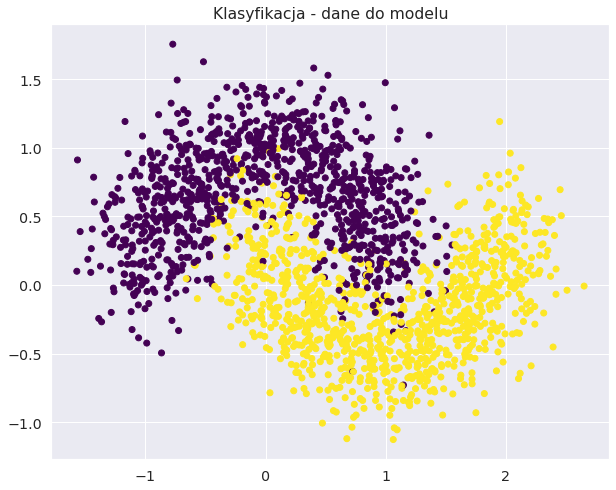

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='viridis')
plt.title('Klasyfikacja - dane do modelu')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

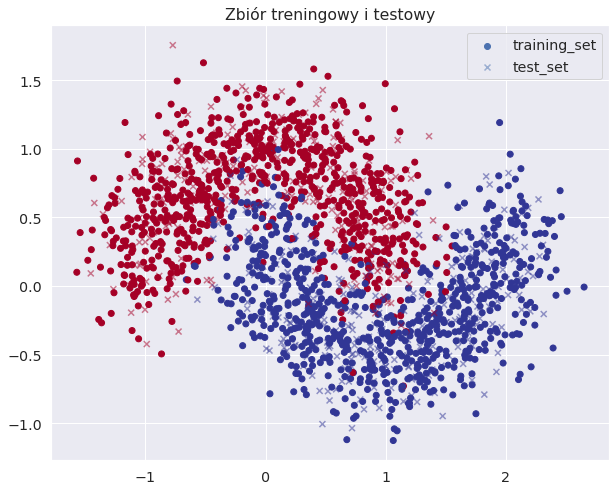

In [6]:
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdYlBu', label = 'training_set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', marker='x', alpha=0.5, label='test_set')
plt.title('Zbiór treningowy i testowy')
plt.legend()
plt.show()

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier()

params = {'max_depth': np.arange(1,10),
          'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,15,20]}

grid_search = GridSearchCV(classifier, param_grid = params, scoring = 'accuracy', cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
    

In [8]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 6}

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



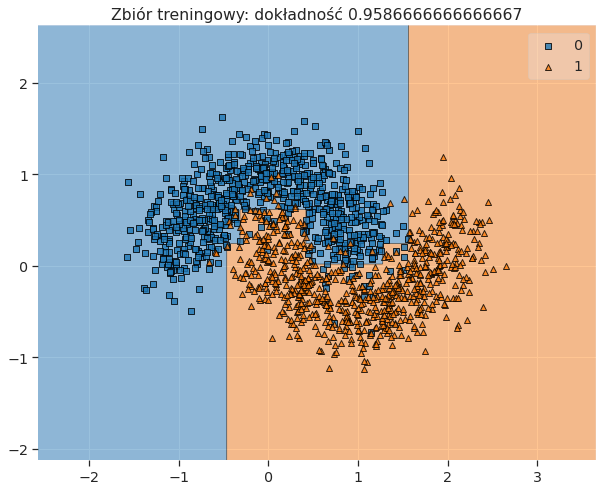

In [9]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10,8))
plot_decision_regions(X_train, y_train, grid_search)
plt.title(f'Zbiór treningowy: dokładność {grid_search.score(X_train, y_train)}')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



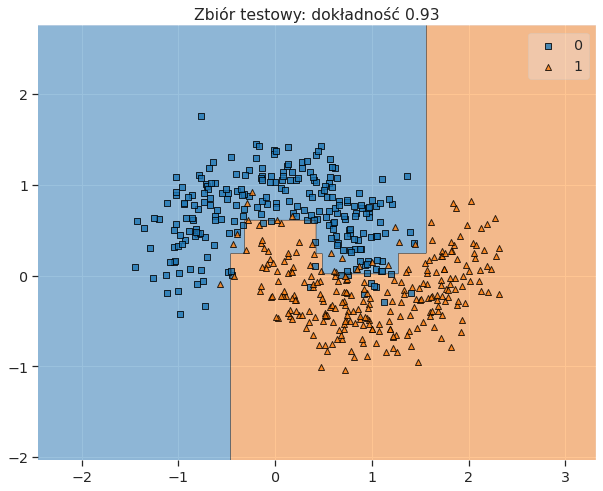

In [10]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór testowy: dokładność {grid_search.score(X_test, y_test)}')
plt.show()

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier(random_state=42)

param_grid = {'max_depth': np.arange(1,10),
          'criterion': ['gini', 'entropy'],
          'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,15,20]}

grid_search = GridSearchCV(classifier, param_grid = param_grid, n_jobs = -1, scoring = 'accuracy', cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                       

In [12]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6}

In [13]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



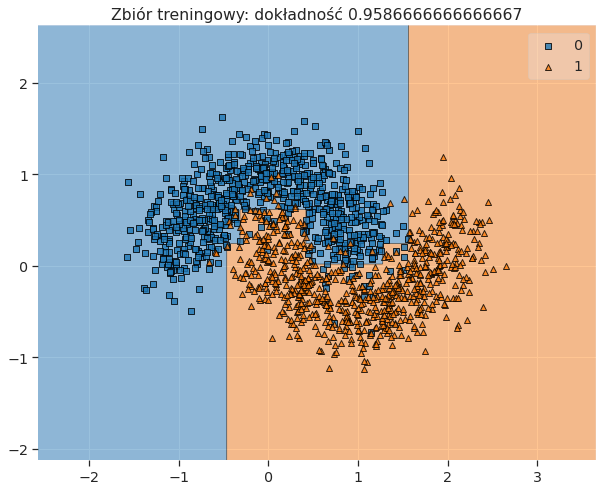

In [14]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10,8))
plot_decision_regions(X_train, y_train, grid_search)
plt.title(f'Zbiór treningowy: dokładność {grid_search.score(X_train, y_train)}')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



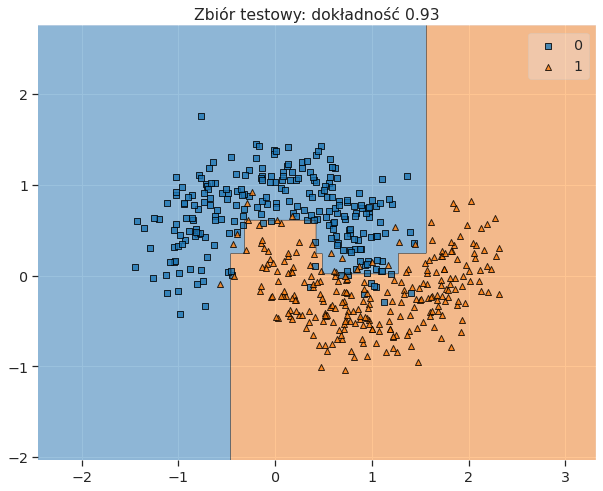

In [15]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór testowy: dokładność {grid_search.score(X_test, y_test)}')
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state = 42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(4,10),
    'min_samples_leaf': [4,5,6,7,8,9,10],
    'n_estimators': [50]
}

grid_search = GridSearchCV(classifier, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [17]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 4,
 'n_estimators': 50}

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



Text(0.5, 1.0, 'Zbiór testowy: dokładność 0.9613')

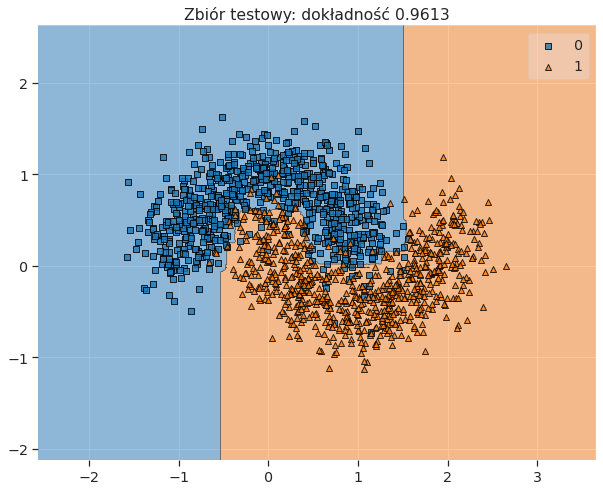

In [19]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_train, y_train, grid_search)
plt.title(f'Zbiór testowy: dokładność {grid_search.score(X_train, y_train):.4f}')

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



Text(0.5, 1.0, 'Zbiór testowy: dokładność 0.9320')

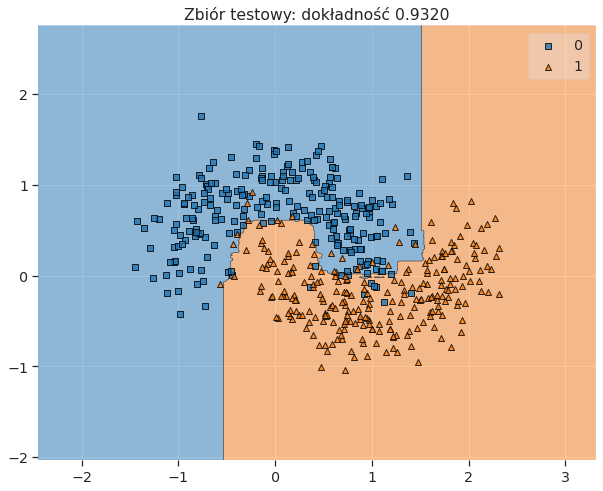

In [20]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór testowy: dokładność {grid_search.score(X_test, y_test):.4f}')

## Zad 26

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.3)
np.random.seed(42)

In [23]:
raw_digits = datasets.load_digits()
digits = raw_digits.copy()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [32]:
images = digits['images']
targets = digits['target']
images.shape

(1797, 8, 8)

In [33]:
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

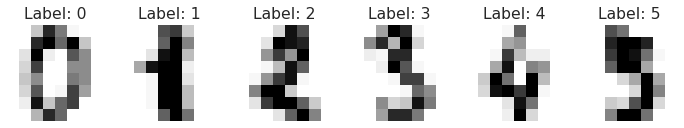

In [34]:
plt.figure(figsize=(12,10))
for index, (image, target) in enumerate(list(zip(images, targets))[:6]):
    plt.subplot(2,6, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap = 'Greys')
    plt.title(f'Label: {target}')

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, targets)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print()
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (1347, 8, 8)
X_test shape: (450, 8, 8)
y_train shape: (1347,)
y_test shape: (450,)

X_train shape: (1347, 64)
X_test shape: (450, 64)


In [37]:
X_train[0]

array([ 0.,  0.,  2., 15., 15., 16., 11.,  0.,  0.,  0.,  8., 16., 11.,
        3.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  5.,
       16.,  3.,  9., 11.,  3.,  0.,  0., 10., 15., 15., 16., 16., 11.,
        0.,  0.,  6., 16., 10.,  7., 16.,  5.,  0.,  0.,  0.,  3.,  4.,
       15.,  8.,  0.,  0.,  0.,  0.,  4., 15.,  7.,  0.,  0.,  0.])

In [38]:
y_train[0]

5

In [39]:
from sklearn.svm import SVC

classifier = SVC(gamma = 0.001, kernel = 'linear')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
classifier.score(X_test, y_test)

0.9822222222222222

In [41]:
from sklearn.svm import SVC

classifier = SVC(gamma = 0.001, kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
classifier.score(X_test, y_test)

0.9888888888888889

In [43]:
y_pred = classifier.predict(X_test)

In [44]:
y_pred

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 7, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        38
           3       1.00      0.96      0.98        46
           4       1.00      1.00      1.00        55
           5       0.97      1.00      0.98        59
           6       1.00      1.00      1.00        45
           7       0.98      0.98      0.98        41
           8       0.97      1.00      0.99        38
           9       0.98      0.96      0.97        48

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [47]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 55,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 59,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 46]])

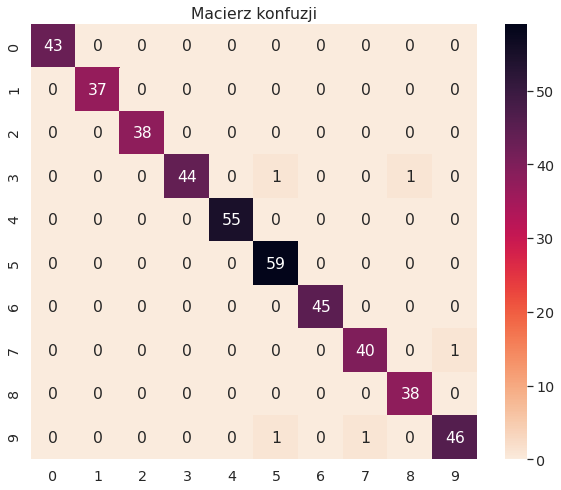

In [48]:
plt.figure(figsize=(10,8))
plt.title('Macierz konfuzji')
sns.heatmap(data = cm, annot = True, cmap = sns.cm.rocket_r)

In [55]:
def plot_confusion_matrix(y_true = y_test, y_pred = y_pred):
    import plotly.figure_factory as ff
    from sklearn.metrics import accuracy_score
    import pandas as pd
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    columns = ['pred_'+str(i) for i in range(cm.shape[0])]
    index = ['true_'+str(i) for i in range(cm.shape[0])]
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns = columns, index = index[::-1])

    fig = ff.create_annotated_heatmap(z = cm.values, x = list(cm.columns), y = list(cm.index),
                                      colorscale = 'ice', showscale = True, reversescale = True)
    
    fig.update_layout(width = 90*len(columns), height = 90*len(columns), title = f'Confusion Matrix, accuracy: {acc:.2f}', font_size = 14)
    fig.show()

plot_confusion_matrix(y_test, y_pred)

In [56]:
results = pd.DataFrame(data = {'y_pred': y_pred, 'y_test': y_test, 'error': y_pred-y_test})

In [57]:
results.head(10)

,y_pred,y_test,error
0,6,6,0
1,9,9,0
2,3,3,0
3,7,7,0
4,2,2,0
5,1,1,0
6,5,5,0
7,2,2,0
8,5,5,0
9,2,2,0


In [58]:
results[results.error != 0]

,y_pred,y_test,error
133,9,7,2
149,5,3,2
159,7,9,-2
249,5,9,-4
431,8,3,5


In [59]:
%tensorflow_version 2.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets.fashion_mnist import load_data

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set(font_scale=1.3)

In [60]:
(X_train, y_train), (X_test, y_test) = load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [61]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train[0] shape: {X_train[0].shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train[0] shape: (28, 28)


In [62]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

In [63]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

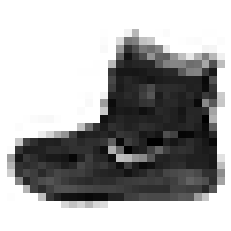

In [64]:
plt.imshow(X_train[0], cmap = 'gray_r')
plt.axis('off')

In [66]:
class_name = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

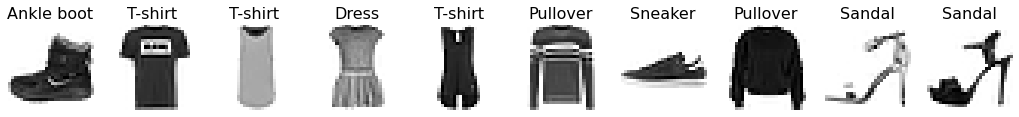

In [67]:
plt.figure(figsize=(18,13))
for i  in range(1,11):
    plt.subplot(1,10,i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap = 'gray_r')
    plt.title(class_name[y_train[i-1]], color = 'black', fontsize = 16)
plt.show()

In [68]:
X_train = X_train/255
X_test = X_test/255

In [69]:
X_train.shape

(60000, 28, 28)

In [71]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)
X_test.shape

(10000, 784)

In [72]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
y_pred = classifier.predict(X_test)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [74]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8828

In [75]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[857,   0,  16,  28,   3,   2,  85,   0,   9,   0],
       [  4, 962,   2,  25,   3,   0,   4,   0,   0,   0],
       [ 11,   2, 816,  16,  88,   0,  65,   0,   2,   0],
       [ 27,   3,  11, 890,  33,   0,  32,   0,   4,   0],
       [  1,   1,  87,  32, 815,   0,  61,   0,   3,   0],
       [  0,   0,   0,   1,   0, 951,   0,  33,   1,  14],
       [135,   1, 104,  27,  68,   0, 654,   0,  11,   0],
       [  0,   0,   0,   0,   0,  21,   0, 955,   0,  24],
       [  3,   1,   1,   5,   2,   2,   4,   5, 977,   0],
       [  0,   0,   0,   0,   0,  11,   1,  37,   0, 951]])

In [76]:
def plot_confusion_matrix(y_true = y_test, y_pred = y_pred):
    import plotly.figure_factory as ff
    from sklearn.metrics import accuracy_score
    import pandas as pd
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    columns = ['pred_'+str(i) for i in range(cm.shape[0])]
    index = ['true_'+str(i) for i in range(cm.shape[0])]
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns = columns, index = index[::-1])

    fig = ff.create_annotated_heatmap(z = cm.values, x = list(cm.columns), y = list(cm.index),
                                      colorscale = 'ice', showscale = True, reversescale = True)
    
    fig.update_layout(width = 90*len(columns), height = 90*len(columns), title = f'Confusion Matrix, accuracy: {acc:.2f}', font_size = 14)
    fig.show()

plot_confusion_matrix()

In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.79      0.82      0.80      1000
           3       0.87      0.89      0.88      1000
           4       0.81      0.81      0.81      1000
           5       0.96      0.95      0.96      1000
           6       0.72      0.65      0.69      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.98      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [78]:
results = pd.DataFrame(data = {'y_pred': y_pred, 'y_test': y_test})
results.head(10)

,y_pred,y_test
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
5,1,1
6,4,4
7,6,6
8,5,5
9,7,7


In [79]:
errors = results[results.y_pred != results.y_test]
errors_idxs = list(errors.index)
errors_idxs[:10]

[12, 17, 23, 25, 40, 42, 49, 51, 66, 67]

In [80]:
results.loc[errors_idxs[:10], :]

,y_pred,y_test
12,5,7
17,2,4
23,5,9
25,2,4
40,0,6
42,6,3
49,6,2
51,2,4
66,3,2
67,4,3


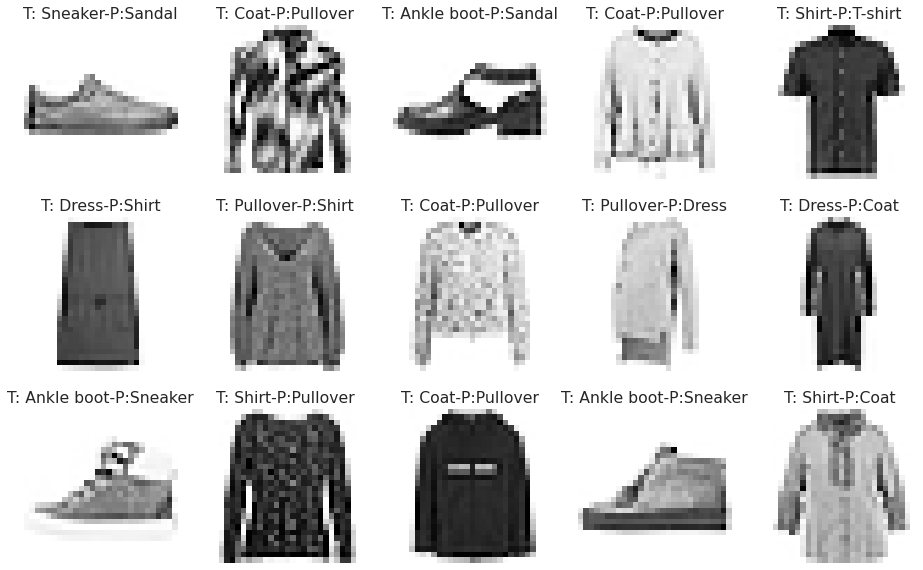

In [83]:
plt.figure(figsize=(16,10))
for idx, error_idx in enumerate(errors_idxs[:15]):
    image = X_test[error_idx].reshape(28,28)
    plt.subplot(3,5, idx + 1)
    plt.axis('off')
    plt.imshow(image, cmap = 'Greys')
    plt.title(f"T: {class_name[results.loc[error_idx, 'y_test']]}-P:{class_name[results.loc[error_idx, 'y_pred']]}")

## Zad 27

In [85]:
import numpy as np
import pandas as pd
import plotly.express as px
import sklearn

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True, edgeitems=10, linewidth=1000, formatter=dict(float=lambda x: f'{x:.2f}'))
sklearn.__version__

'0.22.2.post1'

In [86]:
documents = [
    'Today is Friday',
    'I like Friday',
    'Today I am going to learn Python.',
    'Friday, Friday!!!'
]

print(documents)

['Today is Friday', 'I like Friday', 'Today I am going to learn Python.', 'Friday, Friday!!!']


### Wektoryzacja tekstu

In [88]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit_transform(documents)

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [89]:
vectorizer.fit_transform(documents).toarray()

array([[0, 1, 0, 1, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 1, 1, 1],
       [0, 2, 0, 0, 0, 0, 0, 0, 0]])

In [90]:
vectorizer.get_feature_names()

['am', 'friday', 'going', 'is', 'learn', 'like', 'python', 'to', 'today']

In [91]:
df = pd.DataFrame(data = vectorizer.fit_transform(documents).toarray(),
                  columns = vectorizer.get_feature_names())

df

,am,friday,going,is,learn,like,python,to,today
0,0,1,0,1,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0
2,1,0,1,0,1,0,1,1,1
3,0,2,0,0,0,0,0,0,0


In [92]:
vectorizer.vocabulary_

{'am': 0,
 'friday': 1,
 'going': 2,
 'is': 3,
 'learn': 4,
 'like': 5,
 'python': 6,
 'to': 7,
 'today': 8}

In [93]:
vectorizer.transform(['Friday morning']).toarray()

array([[0, 1, 0, 0, 0, 0, 0, 0, 0]])

### Wektoryzacja tekstu - bigramy

In [95]:
bigram = CountVectorizer(ngram_range=(1,2), min_df = 1)
bigram.fit_transform(documents).toarray()

array([[0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0],
       [0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [96]:
bigram.vocabulary_

{'am': 0,
 'am going': 1,
 'friday': 2,
 'friday friday': 3,
 'going': 4,
 'going to': 5,
 'is': 6,
 'is friday': 7,
 'learn': 8,
 'learn python': 9,
 'like': 10,
 'like friday': 11,
 'python': 12,
 'to': 13,
 'to learn': 14,
 'today': 15,
 'today am': 16,
 'today is': 17}

In [97]:
df = pd.DataFrame(data = bigram.fit_transform(documents).toarray(),
                  columns = bigram.get_feature_names())

df

,am,am going,friday,friday friday,going,going to,is,is friday,learn,learn python,like,like friday,python,to,to learn,today,today am,today is
0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1
1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,1,1,0,0,1,1,0,0,1,1,0,0,1,1,1,1,1,0
3,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TFIDF Transformer

In [98]:
documents = [
    'Friday morning',
    'Friday chill',
    'Friday - morning',
    'Friday, Friday morning!!!'
]

print(documents)

['Friday morning', 'Friday chill', 'Friday - morning', 'Friday, Friday morning!!!']


In [100]:
counts = vectorizer.fit_transform(documents).toarray()
counts

array([[0, 1, 1],
       [1, 1, 0],
       [0, 1, 1],
       [0, 2, 1]])

In [101]:
df = pd.DataFrame(data = vectorizer.fit_transform(documents).toarray(),
                  columns = vectorizer.get_feature_names())

df

,chill,friday,morning
0,0,1,1
1,1,1,0
2,0,1,1
3,0,2,1


In [102]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
tfidf.fit_transform(counts).toarray()

array([[0.00, 0.63, 0.77],
       [0.89, 0.46, 0.00],
       [0.00, 0.63, 0.77],
       [0.00, 0.85, 0.52]])

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit_transform(documents).toarray()

array([[0.00, 0.63, 0.77],
       [0.89, 0.46, 0.00],
       [0.00, 0.63, 0.77],
       [0.00, 0.85, 0.52]])

In [104]:
tfidf_vectorizer.idf_

array([1.92, 1.00, 1.22])

In [105]:
from sklearn.datasets import fetch_20newsgroups

raw_data = fetch_20newsgroups(subset = 'train', categories = ['comp.graphics'], random_state = 42)
raw_data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [107]:
all_data = raw_data.copy()
all_data['data'][:5]

["From: bbs.mirage@tsoft.net (Jerry Lee)\nSubject: Cobra 2.0 1-b-1 Video card HELP ME!!!!\nOrganization: The TSoft BBS and Public Access Unix, +1 415 969 8238\nLines: 22\n\nDoes ANYONE out there in Net-land have any information on the Cobra 2.20 \ncard?  The sticker on the end of the card reads\n        Model: Cobra 1-B-1\n        Bios:  Cobra v2.20\n\nI Havn't been able to find anything about it from anyone!  If you have \nany information on how to get a hold of the company which produces the \ncard or know where any drivers are for it, PLEASE let me know!\n\nAs far as I can tell, it's a CGA card that is taking up 2 of my 16-bit \nISA slots but when I enable the test patterns, it displays much more than \nthe usualy 4 CGA colors... At least 16 from what I can count.. Thanks!\n\n              .------------------------------------------.\n              : Internet: jele@eis.calstate.edu          :\n              :           bbs.mirage@gilligan.tsoft.net  :\n              :           bbs.

In [108]:
print(all_data['data'][0])

From: bbs.mirage@tsoft.net (Jerry Lee)
Subject: Cobra 2.0 1-b-1 Video card HELP ME!!!!
Organization: The TSoft BBS and Public Access Unix, +1 415 969 8238
Lines: 22

Does ANYONE out there in Net-land have any information on the Cobra 2.20 
card?  The sticker on the end of the card reads
        Model: Cobra 1-B-1
        Bios:  Cobra v2.20

I Havn't been able to find anything about it from anyone!  If you have 
any information on how to get a hold of the company which produces the 
card or know where any drivers are for it, PLEASE let me know!

As far as I can tell, it's a CGA card that is taking up 2 of my 16-bit 
ISA slots but when I enable the test patterns, it displays much more than 
the usualy 4 CGA colors... At least 16 from what I can count.. Thanks!

              .------------------------------------------.
              : Internet: jele@eis.calstate.edu          :
              :           bbs.mirage@gilligan.tsoft.net  :
              :           bbs.mirage@tsoft.sf-bay.org

In [109]:
all_data['target_names']

['comp.graphics']

In [110]:
all_data['target'][:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [111]:
tfidf = TfidfVectorizer()
tfidf.fit_transform(all_data['data']).toarray()

array([[0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.04, 0.00, 0.00],
       [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 

In [112]:
import numpy as np
import pandas as pd
import plotly.express as px
import sklearn

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True, edgeitems=10, linewidth=1000, formatter=dict(float=lambda x: f'{x:.2f}'))
sklearn.__version__

'0.22.2.post1'

In [113]:
!wget https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/movie_reviews.zip

--2020-12-22 15:20:38--  https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/movie_reviews.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4004848 (3.8M) [application/zip]
Saving to: ‘movie_reviews.zip’

movie_reviews.zip   100%[===================>]   3.82M  --.-KB/s    in 0.1s    

2020-12-22 15:20:38 (28.2 MB/s) - ‘movie_reviews.zip’ saved [4004848/4004848]



In [114]:
!unzip -q movie_reviews.zip

In [116]:
!pwd
!ls

/content
movie_reviews  movie_reviews.zip  sample_data


In [117]:
from sklearn.datasets import load_files

raw_movie = load_files('movie_reviews')
movie = raw_movie.copy()
movie.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [118]:
movie['target'][:10]

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [119]:
movie['data'][:10]

[b"arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . \nit's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? \nonce again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . \nin this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . \nwith the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! \nparts of this are actually so absurd , that they would fit right in with dogma . \nyes , the film is

In [120]:
movie['target_names'][:10]

['neg', 'pos']

In [121]:
movie['filenames'][:2]

array(['movie_reviews/neg/cv405_21868.txt', 'movie_reviews/pos/cv190_27052.txt'], dtype='<U33')

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(movie['data'], movie['target'], random_state = 42)
len(X_train)

1500

In [124]:
X_train[0]

b'unzipped is a cinematic portrait of isaac mizrahi , an artist whose palette is fabric . \nostensibly , the film is a documentary , but use of that term requires stretching its meaning . \nmany scenes appear staged , and a great deal of cutting-and-pasting has been done in the editing room . \nthe cinema verite effect is a conceit -- genuine spontaneity is at a premium , and everyone is aware of and playing to the camera ( especially would-be actresses like cindy crawford ) . \ndirector douglas keeve ( who was mizrahi\'s lover at the time ) freely admits that he " couldn\'t care less about the truth " but was more interested in capturing " the spirit and love in isaac and in fashion . " \ndespite violating nearly every rule of " legitimate " documentary film making , however , unzipped is a remarkably enjoyable piece of entertainment . \nwhile it sheds only a little light on the behind-the-scenes world of the fashion industry , it presents a fascinating , if incomplete , picture of de

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

print(f'X_train shape {X_train.shape}')

X_train shape (1500, 3000)


In [126]:
X_train[0].toarray()

array([[0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.06, 0.00, ..., 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]])

In [127]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.804

In [128]:
from sklearn.metrics import confusion_matrix

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[204,  36],
       [ 62, 198]])

In [135]:
def plot_confusion_matrix(y_true = y_test, y_pred = y_pred):
    import plotly.figure_factory as ff
    from sklearn.metrics import accuracy_score
    import pandas as pd
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    columns = ['pred_'+str(i) for i in range(cm.shape[0])]
    index = ['true_'+str(i) for i in range(cm.shape[0])]
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns = columns, index = index[::-1])

    fig = ff.create_annotated_heatmap(z = cm.values, x = list(cm.columns), y = list(cm.index),
                                      colorscale = 'ice', showscale = True, reversescale = True)
    
    fig.update_layout(width = 250 + 60*len(columns), height = 250 + 60*len(columns), title = f'Confusion Matrix, accuracy: {acc:.2f}', font_size = 14)
    fig.show()

plot_confusion_matrix(y_test, y_pred)

In [136]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names = ['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.77      0.85      0.81       240
    positive       0.85      0.76      0.80       260

    accuracy                           0.80       500
   macro avg       0.81      0.81      0.80       500
weighted avg       0.81      0.80      0.80       500



In [137]:
new_reviews = ['It was awesome! Very interesting story.', 
               'I cannot recommend this film. Short and awful.',
               'Very long and boring. Don\'t waste your time.',
               'Well-organized and quite interesting.']

new_reviews_tfidf = tfidf.transform(new_reviews)
new_reviews_tfidf

<4x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 24 stored elements in Compressed Sparse Row format>

In [138]:
new_reviews_tfidf.toarray()

array([[0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00, 0.00, 0.00, 0.34, 0.00, 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]])

In [139]:
new_reviews_predict = classifier.predict(new_reviews_tfidf)
new_reviews_predict

array([1, 0, 0, 1])

In [140]:
new_reviews_prob = classifier.predict_proba(new_reviews_tfidf)
new_reviews_prob

array([[0.48, 0.52],
       [0.63, 0.37],
       [0.77, 0.23],
       [0.44, 0.56]])

In [141]:
np.argmax(new_reviews_prob, axis = 1)

array([1, 0, 0, 1])

In [142]:
movie['target_names']

['neg', 'pos']

In [143]:
for review, target, prob in zip(new_reviews, new_reviews_predict, new_reviews_prob):
    print(f"{review} -> {movie['target_names'][target]} -> {prob[target]:.4f}")

It was awesome! Very interesting story. -> pos -> 0.5232
I cannot recommend this film. Short and awful. -> neg -> 0.6345
Very long and boring. Don't waste your time. -> neg -> 0.7732
Well-organized and quite interesting. -> pos -> 0.5628
